<a href="https://colab.research.google.com/github/jfdoppler/DNL-1c2020/blob/master/DNL_1C2020_integracion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración II
Colabs gentileza de Juan Doppler.
## Odeint

Hay diversos métodos, más o menos precisos y que funcionan para diversos sistemas. Scipy trae un integrador bastante bueno llamado ["odeint"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) (no teman a la documentación).

El odeint necesita que le digamos como calcular la derivada en cada punto (tenemos que darle el campo vector), las condiciones iniciales y los tiempos donde queremos que integre.

Por ejemplo, hagamos:

$$ \dot{x} = -x^{2} + 4 $$ 

In [0]:
#Importamos las librerias, ahora con odeint
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

El integrador necesita que definamos el campo vector de cierta forma para que pueda interpretarlo correctamente. En particular, el primer argumento que reciba tiene que ser la variable (o una lista con las variables). El segundo argumento tiene que ser el tiempo (aunque no aparezca explícitamente en las ecuaciones). Luego pueden ponerse argumentos adicionales (si los hay).

El campo vector tiene que devolver la derivada en el punto, o una lista con las derivadas de cada componente.

In [0]:
def dxdt(x, t):
    return -x**2 + 4

El odeint se invoca de la siguiente forma:


```
odeint(campo vector, condiciones iniciales, vector de tiempos)
```


Donde el primer argumento es el campo vector (definido de la forma que lo hicimos arriba), el segundo es la condición inicial (o una lista con las condiciones iniciales de cada variable) y el tercero es una lista de tiempos donde queremos que nos de el resultado de la integración.

In [0]:
dt = 0.1
t = np.arange(0, 5, step=dt)
x0 = 10
solucion = odeint(dxdt, x0, t)  #odeint hace algo y su output lo guardamos en la variable "solucion"

Veamos qué es lo que nos devuelve el odeint:

In [0]:
print(solucion)

[[10.        ]
 [ 5.23170416]
 [ 3.71063606]
 [ 3.00498074]
 [ 2.62212756]
 [ 2.39668427]
 [ 2.25748693]
 [ 2.16901186]
 [ 2.11173555]
 [ 2.07421511]
 [ 2.04944543]
 [ 2.03300974]
 [ 2.02206706]
 [ 2.01476514]
 [ 2.00988534]
 [ 2.00662095]
 [ 2.00443573]
 [ 2.00297228]
 [ 2.00199189]
 [ 2.00133498]
 [ 2.00089477]
 [ 2.00059973]
 [ 2.00040199]
 [ 2.00026945]
 [ 2.00018062]
 [ 2.00012107]
 [ 2.00008116]
 [ 2.0000544 ]
 [ 2.00003647]
 [ 2.00002444]
 [ 2.00001638]
 [ 2.00001098]
 [ 2.00000736]
 [ 2.00000493]
 [ 2.0000033 ]
 [ 2.00000221]
 [ 2.00000149]
 [ 2.000001  ]
 [ 2.00000067]
 [ 2.00000045]
 [ 2.0000003 ]
 [ 2.0000002 ]
 [ 2.00000013]
 [ 2.00000009]
 [ 2.00000006]
 [ 2.00000004]
 [ 2.00000003]
 [ 2.00000002]
 [ 2.00000001]
 [ 2.00000001]]


Si queremos convertilo en la lista "bonita" podemos hacer lo siguiente (esta forma de escribirlo nos va a servir cuando lo hagamos en 2D!)

[10.          5.23170416  3.71063606  3.00498074  2.62212756  2.39668427
  2.25748693  2.16901186  2.11173555  2.07421511  2.04944543  2.03300974
  2.02206706  2.01476514  2.00988534  2.00662095  2.00443573  2.00297228
  2.00199189  2.00133498  2.00089477  2.00059973  2.00040199  2.00026945
  2.00018062  2.00012107  2.00008116  2.0000544   2.00003647  2.00002444
  2.00001638  2.00001098  2.00000736  2.00000493  2.0000033   2.00000221
  2.00000149  2.000001    2.00000067  2.00000045  2.0000003   2.0000002
  2.00000013  2.00000009  2.00000006  2.00000004  2.00000003  2.00000002
  2.00000001  2.00000001]


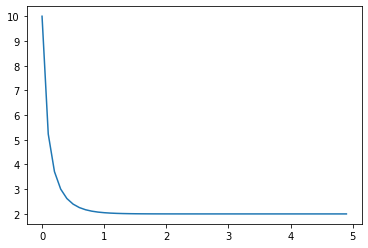

In [0]:
x = solucion[:, 0]
print(x)
plt.plot(t, x)

**Ojo con el dt**

Atención! Para odeint, el vector de tiempos solo le dice en qué momentos queremos que devuelva el resultado de la integración. El paso temporal real lo va a ir ajustando sin avisarnos!

Para convencernos comparemos 2 integraciones con tiempos muy distintos:

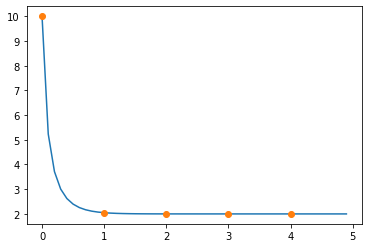

In [0]:
# Graficamos la solución que teníamos de antes, con paso temporal "chico"
plt.plot(t, x)
# Hacemos otra integración con paso temporal "grande"
dt = 1
t2 = np.arange(0, 5, step=dt)
x0 = 10
sol2 = odeint(dxdt, x0, t2)
x2 = sol2[:, 0]
plt.plot(t2, x2, 'o')

**Ecuaciones con parámetros, cómo pasarle argumentos al odeint**


Una de las cosas que nos suele interesar es analizar como cambian los flujos cuando cambiamos algún parámetro. Para eso está bueno tener una función definida y pasarle el parámetro que queremos ir moviendo como un argumento. Esto se puede hacer con el odeint, agregando un argumento (una tupla) cuando lo llamamos:



```
x = odeint(campo_vector, xi, t, args=(parametro1, parametro2))
```


Para que esto funcione, nuestro campo vector tiene que saber como tomar esos parámetros! Por eso tenemos que definirlo con:


```
def campo_vector(x, t, parametro1, parametro2)
```


Veamos el ejemplo del switch bioquímico, donde el campo vector se definía como:

$$
\dot{x} = s-rx+\dfrac{x^2}{1+x^2}
$$
con (r, s) dos parámetros que vamos a ir variando.

Text(0, 0.5, 'x')

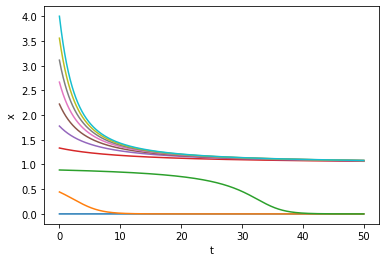

In [0]:
# Definimos el campo vector, con los dos parámetros r y s
def campo_vector(x, t, r, s):
    dxdt = s - r*x + x**2/(1+x**2)
    return dxdt

# Definimos tiempo máximo, paso y un vector de tiempos
tmax = 50.
dt = 1./100
t = np.arange(0, tmax, dt)

# Le damos algún valor a los dos parámetros
r = 0.5
s = 0

# Nos preparamos varias condiciones iniciales
Xi = np.linspace(0, 4, 10)
for xi in Xi:
    # Para cada una de las condiciones iniciales hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, s))
    # Ploteamos. Python automáticamente va a ir cambiando el color en cada vuelta
    plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')

Ahora para un valor fijo de condición inicial, vemos qué pasa si cambiamos el valor de uno de los parámetros

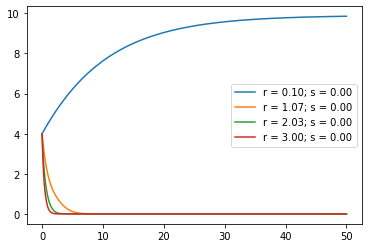

In [0]:
# Nos armamos una lista de valores para r
rs = np.linspace(0.1, 3, 4)
# Ponemos un única condición inicial
xi = 4
for r in rs:
    # Para cada valor del parámetro hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, s))
    # Graficamos y le ponemos una etiqueta a cada curva para reconocerlas
    plt.plot(t, x, label=r'r = {:.2f}; s = {:.2f}'.format(r, s))
# Le pedimos que nos muestre las etiquetas que generamos
plt.legend()

# **Odeint: caso 2D**
En 2 (o más) dimensiones funciona muy parecido. Solo nos tenemos que ocupar de escribir correctamente el campo vector para que el primer argumento sea una lista que va a contener en cada elemento una variable distinta, desempaquetarlo y devolver un array de derivadas.

```
def campo_vector(variables, t):
    var1 = variables[0]
    var2 = variables[1]
    ...
    dvar1 = ...
    dvar2 = ...
    ...
    return [dvar1, dvar2, ...]
```

Veamoslo con el siguiente problema:

$$
\dot{x} = 4x+2y\\
\dot{y} = -17x-5y
$$

In [0]:
def campo_vector(z, t):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = 4*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]

[[ 1.00000000e-02  0.00000000e+00]
 [ 1.00399099e-02 -1.69914326e-04]
 [ 1.00796394e-02 -3.39656489e-04]
 ...
 [ 6.35455004e-06  1.82042740e-04]
 [ 6.74380586e-06  1.81023764e-04]
 [ 7.13257799e-06  1.80003275e-04]]


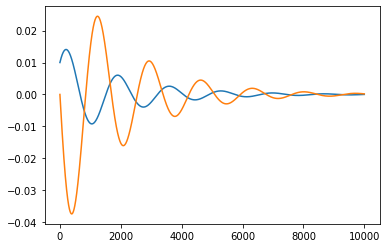

In [0]:
dt = 0.001
t = np.arange(0, 10, dt)
# Ponemos condiciones iniciales
xi = 0.01
yi = 0
# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]
# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales!
sol = odeint(campo_vector, zi, t)
# Vean como nos viene la solución:
plt.plot(sol)
print(sol)

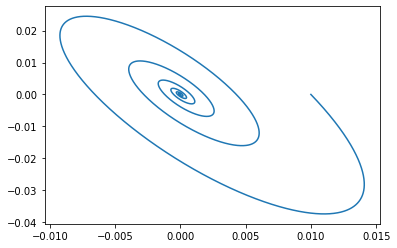

In [0]:
# Cada elemento que nos devuelve es un par de coordenadas [x, y]
# Para recuperar las x por un lado y las y por el otro:
xt = sol[:, 0]
yt = sol[:, 1]
plt.plot(xt, yt)

# **Para visualizar el flujo rápido!**
Una función **muy** útil para tener una buena idea de como es el flujo es [*streamplot*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot). Lo que hace es integrar durante un tiempo corto en una grilla de puntos.

Para hacerlo andar, necesitamos calcular cuanto vale el campo vector en cada punto de la grilla. Primero nos definimos una grilla usando la función [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [0]:
# Definimos una grilla de puntos
XX, YY = np.meshgrid(np.arange(-2, 2, .01), np.arange(-4, 4, .01))

print(XX)
print(np.shape(XX))

[[-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 ...
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]
 [-2.   -1.99 -1.98 ...  1.97  1.98  1.99]]
(800, 400)



Ahora podemos usar el campo vector para calcular las derivadas en cada uno de estos puntos. La sintaxis para hacer esto (y que los argumentos sean potables para el streamplot) es la siguiente:

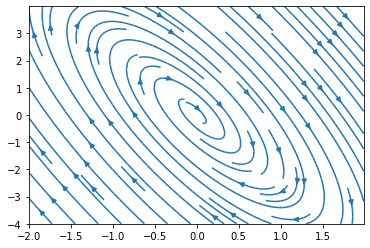

In [0]:
# Calculamos el campo vector en cada punto
DX, DY = campo_vector([XX, YY], 0)

#Y finalmente graficamos
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.1)

# Ejemplo 2 de 2D lineal:

Considere el Ejercicio 1 de la Guía 3:

$$
\dot{x} = 4x - y\\
\dot{y} = 2x + y
$$

Haga un retrato de fases numérico. Marque los autovectores.  

Nosotros lo hacemos rápido con streamplot.

In [0]:
# Lo vamos a hacer con streamplot. Empezamos definiendo el campo vector.
def campovector(z, t):  
    x = z[0]
    y = z[1]
    dxdt = 4 * x - 1 * y
    dydt = 2 * x + 1* y
    return [dxdt, dydt]

#Definimos la matriz asociada, para calcular los autovectores 
def J(x, y):
    return np.matrix(([4, -1], [2, 1]))


In [0]:
#Indicamos cuál es el punto fijo
xpf, ypf = 0, 0

#Como en la intro a python, buscamos los autovectores
eig_val, eig_vec = np.linalg.eig(J(xpf, ypf))

print("Recuerden que nos da los autovecs como columnas:")
print(eig_vec)
#Ahora definimos 
v1=np.array(np.transpose(eig_vec[:,0]))
v2=np.array(np.transpose(eig_vec[:,1]))
print("Despues de esta linea v1 es vector fila: ", v1)

Recuerden que nos da los autovecs como columnas:
[[0.70710678 0.4472136 ]
 [0.70710678 0.89442719]]
Despues de esta linea v1 es vector fila:  [[0.70710678 0.70710678]]


In [0]:
#Ahora nos armamos rectas con las direcciones de los autovecs
x=np.linspace(-5,5,100)
y1=(v1[0,1]/v1[0,0])*x
y2=(v2[0,1]/v2[0,0])*x

#Armamos la grilla y calculamos el campo vector sobre la grilla
XX, YY = np.meshgrid(np.arange(-5, 5, .01), np.arange(-5, 5, .01))
DX, DY = campovector([XX, YY],0)

(-5.0, 5.0)

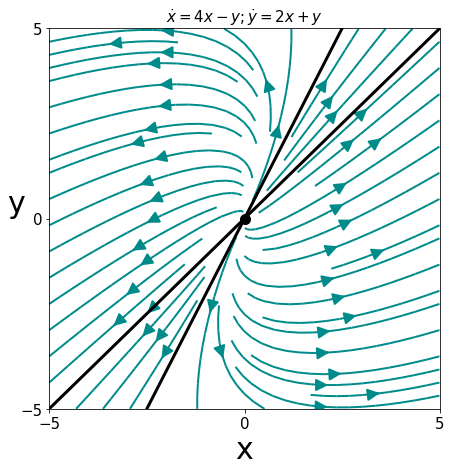

In [0]:
#Pasamos a graficar
plt.figure(figsize=(7,7))
plt.title(r'$\dot{x}=4x-y ; \dot{y}=2x+y$', fontsize=15)
plt.plot(xpf, ypf, 'o',markersize=10, c='k') 

plt.streamplot(XX, YY, DX, DY, density=1, minlength=.3, color='darkcyan',linewidth=2,arrowsize=2.5)

plt.plot(x, y1,'k',lw=3)
plt.plot(x, y2,'k',lw=3)

plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30, rotation=0)

plt.xticks([-5,0,5], fontsize=15)
plt.yticks([-5,0,5], fontsize=15)
plt.xlim([-5,5])
plt.ylim([-5,5])

**Ejercicio sugerido:**

(1) Agregar flechas sobre los autovectores.


(2)Armar el retrato de fases del problema usando odeint. 


# **Buscando el pasado:** Completar trayectorias integrando para atrás

En el espacio de fases, cada punto tiene un único futuro, y en consecuencia, un único pasado. Pueden encontrarse con la necesidad de buscarle el pasado a algún punto en el espacio de fases. 

Al armar un retrato de fases numéricamente, típicamente se toman varias condiciones iniciales y se evoluciona. Sin embargo, para lograr completar el retrato de fases puede que queramos ver "de dónde venían" las trayectorias que evolucionamos. 

Consideremos el ejemplo 2d de arriba: 


$$
\dot{x} = 4x+2y\\
\dot{y} = -17x-5y
$$


Dibujemos el futuro de la trayectoria que empieza en (0.5,0.5), y también el pasado. 

Empecemos integrando "para adelante".

In [0]:
def campo_vector(z, t):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = 4*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]

In [0]:
dt = 0.001
t = np.arange(0, 10, dt)
# Ponemos condiciones iniciales
xi = 0.5
yi = 0.5
# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]
# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales!
sol = odeint(campo_vector, zi, t)
# Cada elemento que nos devuelve es un par de coordenadas [x, y]
# Para recuperar las x por un lado y las y por el otro:
xt = sol[:, 0]
yt = sol[:, 1]

Para saber cuál es el futuro de un punto en el espacio de fases, vamos dejándonos llevar por el campo vector, vamos dibujando una línea siempre tangente. Para saber de cuál es el pasado debemos dibujar "para atrás". Le damos vuelta las flechas al campo vector! (Multiplicamos por -1). 

Veamos qué pasa al multiplicar el campo por -1.

Text(0, 0.5, 'y')

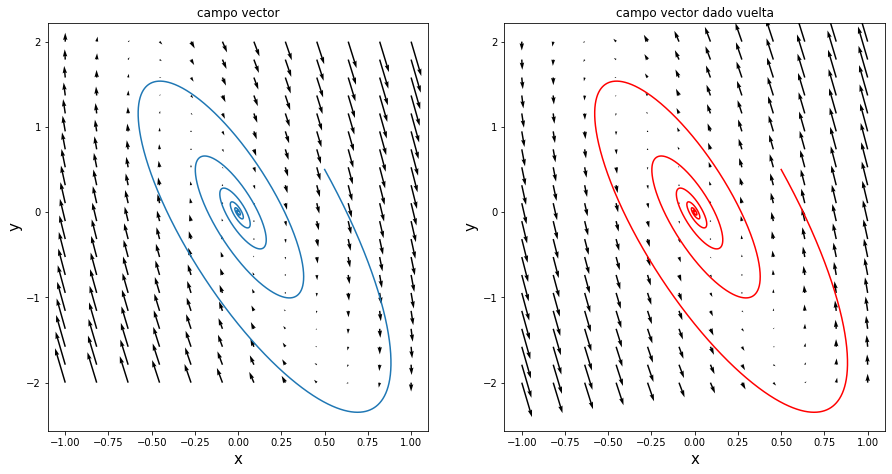

In [6]:
#Damos la grilla de puntos sobre la que miraremos el campo vector
x_grilla, y_grilla= np.meshgrid(np.linspace(-1, 1, 12),np.linspace(-2, 2, 20))
#Damos cuánto valen las componentes del campo vector
dx_grilla = 4 * x_grilla + 2 * y_grilla
dy_grilla = -17 * x_grilla - 5 * y_grilla


#Dibujemos el campo vector dado vuelta
#Ahora las graficamos; usamos quiver de matplotlib -> chusmear la documentacion
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(15,7.5))
ax1.set_title("campo vector")
ax1.quiver(x_grilla, y_grilla, dx_grilla, dy_grilla, color='k')
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('y', fontsize=15)
ax1.plot(xt, yt)

ax2.set_title("campo vector dado vuelta")
ax2.quiver(x_grilla, y_grilla, -dx_grilla, -dy_grilla, color='k')
ax2.plot(xt, yt, 'r')
ax2.set_xlabel('x', fontsize=15)
ax2.set_ylabel('y', fontsize=15)

Ahora sí entonces busquemos el pasado, integrando con el campo dado vuelta.

In [0]:
dt = 0.001
t_past = np.arange(0, -2, -dt)
# Ponemos condiciones iniciales
xi = 0.5
yi = 0.5
# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]
# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales!
sol = odeint(campo_vector, zi, t_past)
# Cada elemento que nos devuelve es un par de coordenadas [x, y]
# Para recuperar las x por un lado y las y por el otro:
x_past = sol[:, 0]
y_past = sol[:, 1]

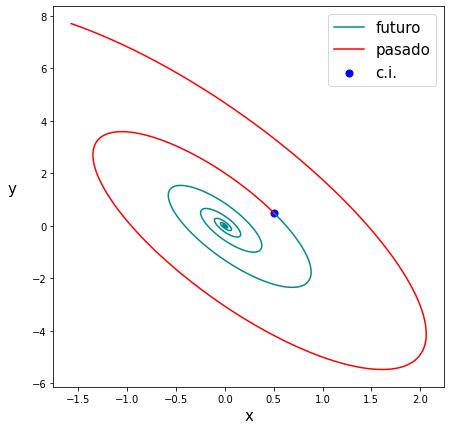

In [8]:
#Graficamos en el espacio de fases
plt.figure(figsize=(7,7))
plt.plot(xt, yt, 'darkcyan', label="futuro")
plt.plot(x_past, y_past, 'r', label="pasado")
plt.scatter(xt[0],yt[0], color='b', s=50, label="c.i.")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)
plt.legend(fontsize=15)

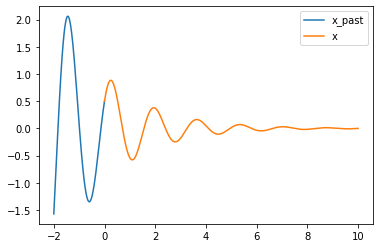

In [9]:
#Y si miramos x(t)
plt.figure()
plt.plot(t_past, x_past, label="x_past")
plt.plot(t, xt , label="x")
plt.legend()